# RMSPROP

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import math

In [43]:
load_data = pd.read_excel(r"C:\Users\SAIDEEPTHI\Downloads\Load Data in kW (2).xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [44]:
type(load_data)

pandas.core.frame.DataFrame

In [45]:
data = load_data.rename(columns={5551.82208:'load'},inplace=False)

In [46]:
data.head()

,load
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [47]:
data.shape

(2183, 1)

In [48]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [50]:
data.corr()

,load
load,1.0


VALIDATING NULL VALUE

In [51]:
data.isnull().sum()

load    0
dtype: int64

VISUALISING OUTLINERS OF DATA

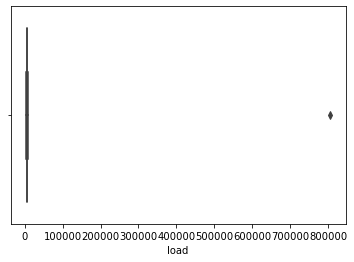

In [52]:
sns.boxplot(x=data['load'])

In [53]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928], dtype=int64),)


From boxplot and from above zscore calculation, we can conclude that there is one outliner. lets replace it.

In [54]:
data.iloc[928,0] = data.iloc[927,0]

AFTER REPLACING THE OUTLINER

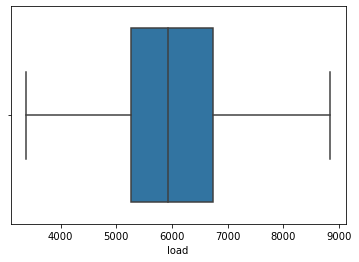

In [55]:
sns.boxplot(x=data['load'])

now all outliners are removed and now we are good to train the model

In [56]:
data_x = []
data_x2 = []
data_y = []
for i in range(24,len(data)):
  data_x.append(data.iloc[i-1,0])
  data_x2.append(data.iloc[i-24,0])
  data_y.append(data.iloc[i,0])

In [57]:
%matplotlib inline

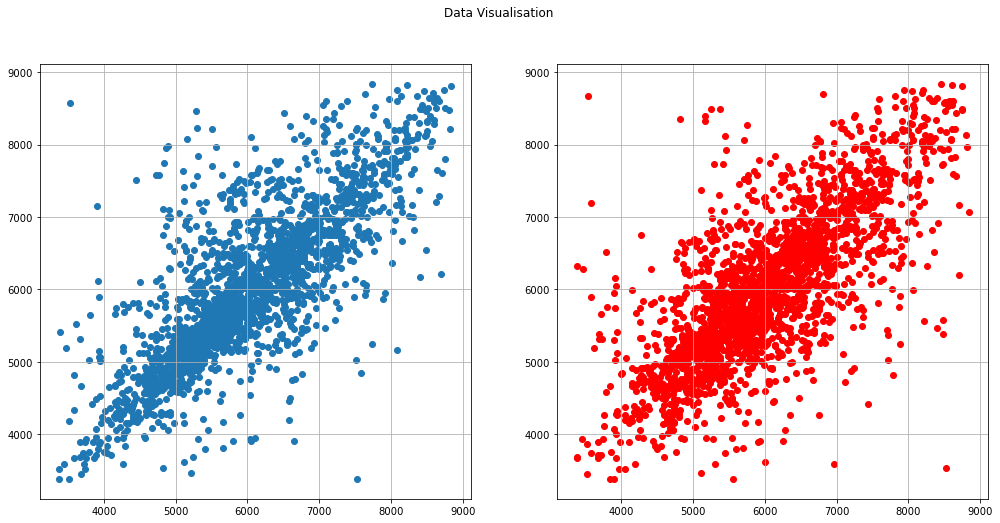

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(17,8))
fig.suptitle("Data Visualisation")
ax1.scatter(data_x,data_y)
ax1.grid()
ax2.scatter(data_x2,data_y,color='red')
ax2.grid()

In [59]:
data_xx1 = pd.DataFrame(data_x)
min_x1 = float(data_xx1.min())
max_x1 = float(data_xx1.max())
data_xx2 = pd.DataFrame(data_x2)
min_x2 = float(data_xx2.min())
max_x2 = float(data_xx2.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x1)
print(min_y)
print(max_x1)
print(max_y)
print(max_x2)
print(min_x2)

3377.9196
3377.9196
8841.66948
8841.66948
8841.66948
3377.9196


# DATA NORMALISATION

In [60]:
x1 = minmax_scale(data_x)
x2 = minmax_scale(data_x2)
y = minmax_scale(data_y)
len(data_y)

2159

In [61]:

data_norm = []
for i in range(len(data)-24):
  data_norm.append([x1[i],x2[i],y[i]])

data_norm = pd.DataFrame(data_norm)
data_norm

,0,1,2
0,0.284300,0.293800,0.255799
1,0.255799,0.276454,0.244501
2,0.244501,0.310234,0.239965
3,0.239965,0.332801,0.268466
4,0.268466,0.414254,0.401472
...,...,...,...
2154,0.305212,0.231719,0.228524
2155,0.228524,0.445808,0.217797
2156,0.217797,0.684146,0.246298
2157,0.246298,0.514679,0.324384


# SPLITTING DATA SET

In [62]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data_norm,test_size=0.1)

In [63]:
data_train.head()

,0,1,2
953,0.657984,0.603891,0.578814
1433,0.190950,0.281219,0.145816
216,0.455308,0.373912,0.498160
662,0.911329,0.028245,0.968332
1295,0.685972,0.692477,0.656757


In [64]:
data_x = np.array(data_train[0])
data_x2 = np.array(data_train[1])
data_y = np.array(data_train[2])
data_x

array([0.65798408, 0.19095033, 0.45530798, ..., 0.22213346, 0.23996462,
       0.48380931])

In [65]:
len(data_x)

1943

In [66]:
len(data_test)

216

TRAINING THE MODEL

In [67]:
# initalising required variables
max_iters=2000
m=1.0
m2=1.0
c=-1.0
Em=0.0
Em2=0.0
Ec=0.0
alpha=0.1
exp=10**(-8)
dm=0.0
dm2=0.0
dc=0.0
iter=1
error=[]
moment = 0.9

In [68]:
while (iter<=max_iters):
    err=0.0
    for i in range(len(data_train)):
        gm=-1*(data_y[i]-(m*data_x[i])-c)*data_x[i]
        gm2=-1*(data_y[i]-(m2*data_x2[i])-c)*data_x2[i]
        gc=-1*(data_y[i]-(m*data_x[i])-c)
        err+=(data_y[i]-m*data_x[i]-m2*data_x2[i]-c)**2
        Em = moment*Em + (1-moment)*(gm**2)
        Em2 = moment*Em2 + (1-moment)*(gm2**2)
        Ec = moment*Ec + (1-moment)*(gc**2)
        r1 = math.sqrt(Em + exp)
        r12 = math.sqrt(Em2 + exp)
        r2 = math.sqrt(Ec + exp)
        dm = -1*(alpha/r1)*gm
        dm2 = -1*(alpha/r12)*gm2
        dc = -1*(alpha/r2)*gc
        m = m + dm
        m2 = m2 + dm2
        c = c + dc
    error.append(err/8)
    iter=iter+1

In [69]:
len(error)

2000

In [70]:
iters = np.arange(max_iters)

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
pred = []
for i in range(len(data_train)):
    pred.append(m*data_x[i] + m2*data_x2[i] + c)

In [73]:
mse_train = mean_squared_error(data_y,pred)

In [74]:
mse_train

0.31538816907855105

In [75]:
data_test

,0,1,2
1759,0.702319,0.715529,0.759322
513,0.527974,0.417049,0.475593
1648,0.394682,0.390831,0.365040
1238,0.663091,0.576817,0.624747
1122,0.116117,0.255428,0.171008
...,...,...,...
141,0.680152,0.533451,0.550312
432,0.394682,0.411115,0.404268
105,0.497161,0.536647,0.426807
492,0.413854,0.417049,0.417049


In [76]:
pred_test = []
pred_test =  m*data_test[0] + m2*data_test[1] + c
mse_test = mean_squared_error(data_test[2],pred_test)

In [77]:
mse_test

0.30099808834010766

# MEAN SQUARED ERRORS

In [78]:
print("training data mean squared error:",mse_train)
print("Testing data mean squared error:",mse_test)

training data mean squared error: 0.31538816907855105
Testing data mean squared error: 0.30099808834010766


In [79]:
print("model parameter:",m,m2,c)

model parameter: 0.9575124973191369 0.9857119102865459 0.05999017184241885


# DEPLOYMENT OF MODEL

In [80]:
input_load = float(input("enter load at one day before : "))
input_load2 = float(input("enter load at one hour before : "))
input_load = (input_load - min_x1)/(max_x1-min_x1)
input_load2 = (input_load2 - min_x2)/(max_x2-min_x2)
output_load = (input_load*m) + (input_load2*m2) +c

output_load = output_load*(max_y-min_y)+min_y

print("predicted load for this hour  : ",output_load)

enter load at one day before : 3347.65
enter load at one hour before : 8841.3
predicted load for this hour  :  9062.026504622416
